In [1]:
from collections import Counter
import sqlite3, math, csv

import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib qt

In [2]:
#db = "/home/jeslev/Downloads/reddit-comments-may-2015/database.sqlite"
db = "/home/jeslev/Downloads/sample_3days.sqlite"

conn = sqlite3.connect(db)
c = conn.cursor()

cpdef double controversy(long ups, long downs):

    """The controversy sort."""
    if downs <= 0 or ups <= 0: return 0
    magnitude = ups + downs
    balance = float(downs) / ups if ups > downs else float(ups) / downs
    return magnitude ** balance  

In [21]:
lines = c.execute("SELECT MIN(ups), MAX(ups) FROM May2015 ")

for line in lines:
    print(line)
    
lines = c.execute("SELECT MIN(gilded), MAX(gilded) FROM May2015 ")

for line in lines:
    print(line)
    
lines = c.execute("SELECT MIN(downs), MAX(downs) FROM May2015 ")

for line in lines:
    print(line)
    
lines = c.execute("SELECT MIN(score), MAX(score) FROM May2015 ")

for line in lines:
    print(line)
    
lines = c.execute("SELECT MIN(controversiality), MAX(controversiality) FROM May2015 ")

for line in lines:
    print(line)

(-1712, 6761)
(0, 27)
(0, 0)
(-1712, 6761)
(0, 1)


In [20]:
lines = c.execute("SELECT link_id,name,subreddit,controversiality FROM May2015 LIMIT 20")

for line in lines:
    print(line)

('t3_34di91', 't1_cqug90g', 'soccer_jp', 0)
('t3_34g8mx', 't1_cqug90h', 'nba', 0)
('t3_34f7mc', 't1_cqug90i', 'politics', 0)
('t3_34f9rh', 't1_cqug90j', 'AskReddit', 0)
('t3_34fvry', 't1_cqug90k', 'AskReddit', 0)
('t3_34gitq', 't1_cqug90l', 'bloodborne', 0)
('t3_34fpen', 't1_cqug90m', 'relationships', 0)
('t3_34e7uq', 't1_cqug90n', 'Tennesseetitans', 0)
('t3_34gcwh', 't1_cqug90o', 'cigars', 0)
('t3_34gmag', 't1_cqug90p', 'GlobalOffensive', 0)
('t3_34gmq6', 't1_cqug90q', 'eagles', 0)
('t3_34eznn', 't1_cqug90r', 'smashbros', 0)
('t3_3479aj', 't1_cqug90s', 'makinghiphop', 0)
('t3_34g2ci', 't1_cqug90t', 'GoogleCardboard', 0)
('t3_34f8k8', 't1_cqug90u', 'offmychest', 0)
('t3_34gj3a', 't1_cqug90v', 'nrl', 0)
('t3_34g58c', 't1_cqug90w', 'elderscrollsonline', 0)
('t3_34fmtj', 't1_cqug90x', 'childfree', 0)
('t3_34ga1g', 't1_cqug90y', 'ExNoContact', 0)
('t3_34ffo5', 't1_cqug90z', 'AskReddit', 0)


In [22]:
# total users
lines = c.execute("SELECT count( distinct(author) )  FROM May2015")

for line in lines:
    print(line)

# total comments
lines = c.execute("SELECT count(*) FROM May2015")

for line in lines:
    print(line)

(2611449,)
(54504410,)


In [23]:
# total subreddits
lines = c.execute("SELECT count( distinct(subreddit_id) ) FROM May2015")

for line in lines:
    print(line)
#

(50138,)


In [76]:
# comments per user
lines = c.execute("SELECT totCmnt, count(*) as totUsers FROM (SELECT author, count(*) as totCmnt FROM May2015 GROUP BY author) WHERE totCmnt<1000 GROUP BY totCmnt")

#for line in lines:
#    print(line)

In [77]:
# verify query
freq = dict()
for line in lines:
    freq[line[0]] = line[1]

tot = 0
for k,v in freq.items():
    tot+=k*v

tot

48624328

In [79]:
tot/54504410*100

89.21173167455623

[1812309, 2388066, 2506951, 2611437]


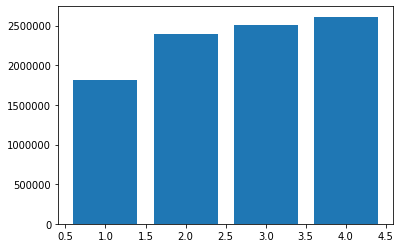

In [75]:
limits = [10, 50, 100,9000]
xList = [i for i in range(1,len(limits)+1)]
yList = [0]*len(xList)

for k,v in freq.items():
    for idx,limit in enumerate(xList):
        if k<limits[idx]:
            yList[idx]+=v

print(yList)
plt.bar(xList, yList )
plt.show()

In [66]:
[ (k,v) for k,v in freq.items() if k>100000]

[]

In [ ]:
# comments per user
lines = c.execute("SELECT author, count(*) as totCmnt FROM May2015 GROUP BY author ORDER BY totCmnt DESC ")

for line in lines:
    print(line)
    
# ('[deleted]', 3457435)
# ('AutoModerator', 286461)
# ('autowikibot', 17805)
# ('TweetsInCommentsBot', 16375)
# ('TweetPoster', 14046)
# ('TrollaBot', 12886)
# ('MTGCardFetcher', 12559)
# ('havoc_bot', 12490)
# ('TotesMessenger', 11626)
# ('TheNitromeFan', 11135)
# ('PoliticBot', 10794)
# ('autotldr', 10339)
# ('Late_Night_Grumbler', 8512)
# ('SharksPwn', 8442)
# ('WritingPromptsRobot', 7432)
# ('atomicimploder', 7319)
# ('Marvelvsdc00', 7134)
# ('SxeRpw', 6576)
# ('fyrechild', 6514)
# ('BiagioLargo', 6083)
# ('Thaddeus-J-Spiderman', 6002)
# ('imgurtranscriber', 5891)
# ('Removedpixel', 5487)
# ('Car5V', 5477)
# ('AttackOnHaseeb', 5429)
# ('PriceZombie', 5417)
# ('hit_bot', 5392)
# ('sufficiency_bot', 5139)
# ('domoarigatobtfcboto', 5109)
# ('rollme', 5100)
# ('GOTradeRuleBot', 5013)
# ('pineapple_lumps', 4983)
# ('Gueltro', 4807)
# ('ttumblrbots', 4684)
# ('Lunas_Disciple', 4498)
# ('ContentForager', 4341)
# ('jesus0nadinosaur', 4310)
# ('catgirl64', 4191)
# ('CMDRCharlesShepard', 4175)
# ('NoBreadsticks', 4134)
# ('Google_Panda', 3985)
# ('tipnyan', 3977)
# ('MayTentacleBeWithYee', 3976)
# ('Redeemed_King', 3965)
# ('RealtechPostBot', 3881)
# ('CallMeEzra', 3838)
# ('Dancatpro', 3828)
# ('reddtipbot', 3729)

In [46]:
# avg ups per subreddit
lines = c.execute("SELECT  MIN(ups), MAX(ups), AVG(ups)  FROM May2015 ")
for line in lines:
    print(line)

(-1712, 6761, 5.735811010521901)


In [81]:
# avg ups per subreddit
lines = c.execute("SELECT subreddit_id, subreddit, MIN(ups), MAX(ups), AVG(ups)  FROM May2015 GROUP BY subreddit_id")

In [82]:
for line in lines:
    print(line)

('t5_1a8ah', 'obama', -20, 18, 1.6433734939759037)
('t5_1efbr', 'ads', -8, 12, 1.297872340425532)
('t5_1rqwi', 'netsec', -46, 300, 5.52317880794702)
('t5_21n6', 'features', 0, 3, 1.0)
('t5_21nj', 'request', -1, 2, 1.1363636363636365)
('t5_21of', 'olympics', -1, 38, 4.577981651376147)
('t5_22i0', 'de', -74, 146, 4.341672152732061)
('t5_22i2', 'es', -10, 6, 1.108910891089109)
('t5_22i3', 'ko', 1, 1, 1.0)
('t5_22i6', 'ja', -1, 2, 0.7209302325581395)
('t5_2478', 'tr', 2, 2, 2.0)
('t5_247b', 'eu', 1, 2, 1.5)
('t5_247c', 'it', 1, 2, 1.2)
('t5_247d', 'nl', 1, 1, 1.0)
('t5_247e', 'no', 0, 4, 1.7073170731707317)
('t5_247h', 'ca', 1, 1, 1.0)
('t5_247i', 'ru', 0, 1, 0.9473684210526315)
('t5_2cneq', 'politics', -332, 3942, 5.386996941945967)
('t5_2fwo', 'programming', -119, 2308, 6.280415557654331)
('t5_2h84o', 'bugs', -1, 5, 1.4282178217821782)
('t5_2qgzg', 'business', -62, 276, 3.374064837905237)
('t5_2qgzt', 'gadgets', -54, 2763, 5.246812060541056)
('t5_2qgzy', 'sports', -113, 3685, 8.458008386

KeyboardInterrupt: 

In [4]:
# most popular subreddits by comments
lines = c.execute("SELECT subreddit_id, subreddit, count(*) as FreqCmt  FROM May2015 GROUP BY subreddit_id ORDER BY FreqCmt DESC LIMIT 20")
# lines = c.execute("SELECT subreddit_id, subreddit, count(*) as FreqCmt, count(distinct(author)) as totUsers ,MIN(ups), MAX(ups), AVG(ups)  FROM May2015 GROUP BY subreddit_id ORDER BY FreqCmt DESC LIMIT 20")
subid = []
for line in lines:
    print(line)
    subid.append(line[1])

('t5_2qh1i', 'AskReddit', 4234970)
('t5_2rfxx', 'leagueoflegends', 1223184)
('t5_2qo4s', 'nba', 756195)
('t5_2qh33', 'funny', 745916)
('t5_2qh0u', 'pics', 630925)
('t5_2qmg3', 'nfl', 566656)
('t5_2sgp1', 'pcmasterrace', 557307)
('t5_2qh1e', 'videos', 556065)
('t5_2qh3l', 'news', 548287)
('t5_2qqjc', 'todayilearned', 519910)
('t5_2vq0w', 'DestinyTheGame', 491904)
('t5_2qh13', 'worldnews', 490354)
('t5_2qi58', 'soccer', 489966)
('t5_2s580', 'DotA2', 466976)
('t5_2s7tt', 'AdviceAnimals', 442396)
('t5_2qh61', 'WTF', 418830)
('t5_2sqho', 'GlobalOffensive', 406439)
('t5_2qiel', 'hockey', 403761)
('t5_2qh3s', 'movies', 376601)
('t5_2sljg', 'SquaredCircle', 361540)


In [6]:
for sub in subid:
    lines = c.execute("SELECT subreddit_id, subreddit, count(*) as FreqCmt, count(distinct(author)) as totUsers ,MIN(ups), MAX(ups), AVG(ups)  FROM May2015 WHERE subreddit='"+sub+"'" )
    for line in lines:
        print(line)

('t5_2qh1i', 'AskReddit', 4234970, 570735, -333, 6761, 12.606223656838184)
('t5_2rfxx', 'leagueoflegends', 1223184, 119324, -438, 4250, 5.679024578477155)
('t5_2qo4s', 'nba', 756195, 45035, -304, 3739, 8.559523667837)
('t5_2qh33', 'funny', 745916, 224081, -618, 5642, 11.30022013202559)
('t5_2qh0u', 'pics', 630925, 205311, -1712, 5508, 11.162436105717795)
('t5_2qmg3', 'nfl', 566656, 41594, -422, 4416, 8.628236531511181)
('t5_2sgp1', 'pcmasterrace', 557307, 91913, -237, 3867, 4.167658041259126)
('t5_2qh1e', 'videos', 556065, 157630, -703, 5205, 11.840430525208385)
('t5_2qh3l', 'news', 548287, 98737, -656, 5523, 7.807642712666906)
('t5_2qqjc', 'todayilearned', 519910, 147096, -1034, 5065, 11.093246908118713)
('t5_2vq0w', 'DestinyTheGame', 491904, 37009, -257, 1340, 2.937312971636742)
('t5_2qh13', 'worldnews', 490354, 99264, -280, 5387, 7.400424999082295)
('t5_2qi58', 'soccer', 489966, 41649, -408, 4186, 10.018582922080308)
('t5_2s580', 'DotA2', 466976, 41467, -367, 2446, 4.678431011443843

In [7]:
# most popular subreddits by  authors
lines = c.execute("SELECT subreddit_id, subreddit, count(*) as FreqCmt  FROM May2015 GROUP BY author ORDER BY FreqCmt DESC LIMIT 20")
for line in lines:
    print(line)

('t5_2w93y', 'thewitcher3', 3457435)
('t5_2qh1i', 'AskReddit', 286461)
('t5_2tcwa', 'Glitch_in_the_Matrix', 17805)
('t5_2rfxx', 'leagueoflegends', 16375)
('t5_2qi5w', 'eagles', 14046)
('t5_2s505', 'RotMG', 12886)
('t5_2sbcz', 'custommagic', 12559)
('t5_2xlcq', 'havoc_bot', 12490)
('t5_2qimj', 'formula1', 11626)
('t5_2u9jq', 'counting', 11135)
('t5_2qh28', 'Stuff', 10794)
('t5_32c70', 'NotYourMothersReddit', 10339)
('t5_2qh1i', 'AskReddit', 8512)
('t5_32yod', 'SupersRP', 8442)
('t5_2s3nb', 'WritingPrompts', 7432)
('t5_2u9jq', 'counting', 7319)
('t5_3055e', 'OmniversePenitentiary', 7134)
('t5_2sljg', 'SquaredCircle', 6576)
('t5_37nk4', 'AsTheClockTurns', 6514)
('t5_2r8lo', 'dragonage', 6083)


In [ ]:
# most popular subreddits by  authors
lines = c.execute("SELECT avgC, count(*) as totUsers FROM (SELECT author, avg(controversiality) as avgC FROM May2015 GROUP BY author)  GROUP BY avgC LIMIT 50")
# verify query
freq = dict()
for line in lines:
    freq[line[0]] = line[1]

tot = 0
for k,v in freq.items():
    tot+=k*v

tot

In [5]:
# most popular subreddits by  authors
lines = c.execute("SELECT DISTINCT controversiality FROM May2015  LIMIT 20")
for line in lines:
    print(line)

(0,)
(1,)


In [14]:
# comments vs UPS
cut = 100
limits = [ i for i in range(-1800, 6800, cut) ]
limits = [-1800, -800, -400, -200, 0, 50,100, 200, 1200, 2200, 3200, 4200, 5200, 6200]
freqs = [0] * len(limits)
lines = c.execute("SELECT score, count(*) AS Freq FROM May2015 GROUP BY score ORDER BY score DESC")
for line in lines:
    for idx,i in enumerate(limits):
        if idx==0:
            continue
        if line[0]>= limits[idx-1] and line[0]<limits[idx]:
            freqs[idx]+=line[1]

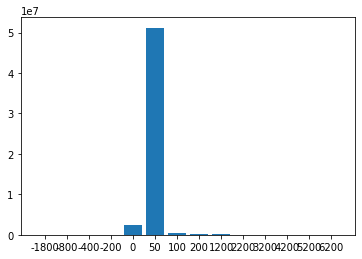

In [16]:
#lfreqs = [math.log(f) if f > 0 else 0 for f in freqs ]
lfreqs = [f for f in freqs ]
#label = [str(idx+1) if i!=0 else '0'for idx,i in enumerate(limits)]
label = [str(i) for i in limits]
plt.bar(label, lfreqs )
plt.show()

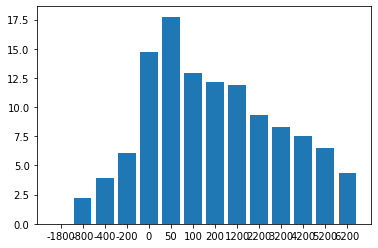

In [17]:
lfreqs = [math.log(f) if f > 0 else 0 for f in freqs ]
#lfreqs = [f for f in freqs ]
#label = [str('+') if i>0 else '-'for i in limits]
label = [str(i) for i in limits]
plt.bar(label, lfreqs )
plt.show()

# Cleaning 

In [4]:
# remove users with lots of comments or names with "bot" within
lines = c.execute("SELECT author, count(*) as totCmnt FROM May2015 GROUP BY author ORDER BY totCmnt DESC ")
banned_users =[]
for line in lines:
    if line[1]<2000:
        break
    author = line[0]
    if line[1]>7000:
        banned_users.append(author)
        continue
    if author.lower()[:-3] == "bot":
        banned_users.append(author)
    

In [5]:
banned_users

['[deleted]',
 'AutoModerator',
 'autowikibot',
 'TweetsInCommentsBot',
 'TweetPoster',
 'TrollaBot',
 'MTGCardFetcher',
 'havoc_bot',
 'TotesMessenger',
 'TheNitromeFan',
 'PoliticBot',
 'autotldr',
 'Late_Night_Grumbler',
 'SharksPwn',
 'WritingPromptsRobot',
 'atomicimploder',
 'Marvelvsdc00']

In [6]:
busers = "''"
for u in banned_users:
    busers += ", '"+u+"'"
busers

"'', '[deleted]', 'AutoModerator', 'autowikibot', 'TweetsInCommentsBot', 'TweetPoster', 'TrollaBot', 'MTGCardFetcher', 'havoc_bot', 'TotesMessenger', 'TheNitromeFan', 'PoliticBot', 'autotldr', 'Late_Night_Grumbler', 'SharksPwn', 'WritingPromptsRobot', 'atomicimploder', 'Marvelvsdc00'"

In [ ]:
query = "DELETE  FROM May2015 WHERE author IN  ("+busers+") "
#query

l = c.execute(query)

In [12]:

lines = c.execute(query)
cnt = 0
with open("dbclean.csv","w") as csvfile:
    writer = csv.writer(csvfile, delimiter='\t')
    q = "created_utc\tups\tsubreddit_id\tlink_id\tname\tsubreddit\tid\tgilded\tauthor\tbody\tparent_id"
    writer.writerow(q.split("\t"))
    for line in lines:
        #result = "\t".join(str(x) for x in line)
        #print(line)
        #print(result)
        #break
        if cnt%1000000 == 0:
            print(cnt)
        nline = [c for c in line]
        nline[9] = nline[9].replace("\n"," ")
        writer.writerow(nline)
        cnt +=1

0
1000000
2000000
3000000
4000000


KeyboardInterrupt: 

In [26]:
query = "SELECT count(*) FROM \
                  (SELECT created_utc, ups, subreddit_id, link_id, name, subreddit, id, gilded, author, body,  parent_id \
                  FROM May2015) as T \
                  WHERE author NOT IN  ("+busers+") ORDER BY created_utc ASC "
lines = c.execute(query)
for line in lines:
    print(line)

(50591620,)
